# Player Dataset Metrics

## Section: Import Data
This section focuses on import libraries and players_teams dataset.
The process involves:
- import pandas, seaborn matplotlib.pyplot libraries
- import players dataset

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

players = pd.read_csv('../basketballPlayoffs/players.csv', delimiter=",")

## Section: Explore Dataset
This section focuses on explore the dataset.
The process involves:
- Find null values
- Erase columns

In [12]:
print(players.head())
players.isnull().sum()

     playerID  pos  firstseason  lastseason  height  weight   
0  abrahta01w    C            0           0    74.0     190  \
1  abrossv01w    F            0           0    74.0     169   
2  adairje01w    C            0           0    76.0     197   
3  adamsda01w  F-C            0           0    73.0     239   
4  adamsjo01w    C            0           0    75.0     180   

             college            collegeOther   birthDate   deathDate  
0  George Washington                     NaN  1975-09-27  0000-00-00  
1        Connecticut                     NaN  1980-07-09  0000-00-00  
2  George Washington                     NaN  1986-12-19  0000-00-00  
3          Texas A&M  Jefferson College (JC)  1989-02-19  0000-00-00  
4         New Mexico                     NaN  1981-05-24  0000-00-00  


playerID          0
pos              78
firstseason       0
lastseason        0
height            0
weight            0
college         167
collegeOther    882
birthDate         0
deathDate         0
dtype: int64

### Erased columns and why

In [13]:
# Dropped columns: 'collegeOther', 'deathDate', 'firstseason', 'lastseason'

# Count the rows where 'firstseason' is not equal to 0
non_zero_firstseason_count = len(players[players['firstseason'] != 0])

# Count the rows where 'firstseason' is not equal to 0
non_zero_lastseason_count = len(players[players['lastseason'] != 0])

# Count the rows where 'deathDate' is not equal to "0000-00-00"
players['deathDate'] = players['deathDate'].str.strip()
non_empty_deathDate_count = len(players[players['deathDate'] != "0000-00-00"])

# Count the rows where 'collegeOther' is not equal to ""
non_nan_collegeOther_count = players['collegeOther'].notna().sum()

print("Number of rows with 'firstseason' different from 0:", non_zero_firstseason_count)
print("Number of rows with 'lastseason' different from 0:", non_zero_lastseason_count)
print("Number of rows with 'collegeOther' different from "":", non_nan_collegeOther_count)
print("Number of rows with 'deathDate' different from '0000-00-00':", non_empty_deathDate_count)
print(players.head)

Number of rows with 'firstseason' different from 0: 0
Number of rows with 'lastseason' different from 0: 0
Number of rows with 'collegeOther' different from : 11
Number of rows with 'deathDate' different from '0000-00-00': 4
     playerID  pos  firstseason  lastseason  height  weight   
0  abrahta01w    C            0           0    74.0     190  \
1  abrossv01w    F            0           0    74.0     169   
2  adairje01w    C            0           0    76.0     197   
3  adamsda01w  F-C            0           0    73.0     239   
4  adamsjo01w    C            0           0    75.0     180   

             college            collegeOther   birthDate   deathDate  
0  George Washington                     NaN  1975-09-27  0000-00-00  
1        Connecticut                     NaN  1980-07-09  0000-00-00  
2  George Washington                     NaN  1986-12-19  0000-00-00  
3          Texas A&M  Jefferson College (JC)  1989-02-19  0000-00-00  
4         New Mexico                     

## Section: Statistics
This section focuses on extraction of important statistics to analyse the dataset.
The process involves:
- Make players height comparison
- Calcule the number of players in each position
- Make top 10 colleges
- Make a correlation matrix

### Players heights comparison

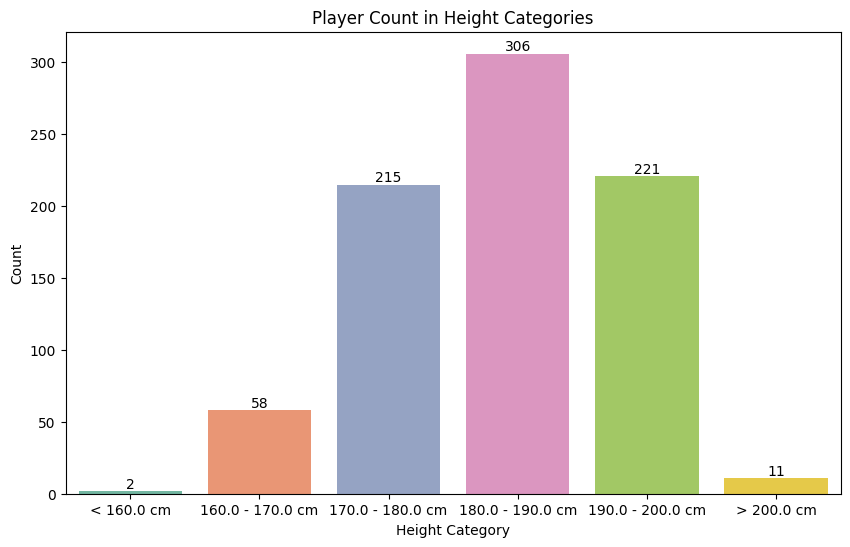

In [5]:
# Convert height from inches to centimeters
players['height_cm'] = players['height'] * 2.54  # 1 inch = 2.54 cm

# Define height categories in centimeters
height_categories = ['< 160.0 cm', '160.0 - 170.0 cm', '170.0 - 180.0 cm', '180.0 - 190.0 cm', '190.0 - 200.0 cm', '> 200.0 cm']

# Define the height ranges for each category
height_ranges = [(0, 160.0), (160.0, 170.0), (170.0, 180.0), (180.0, 190.0), (190.0, 200.0), (200.0, float('inf'))]

# Create a new column in the dataset to store the height category for each player
players['height_category'] = pd.cut(players['height_cm'], bins=[r[0] for r in height_ranges] + [float('inf')], labels=height_categories)

# Count the number of players in each height category
height_category_counts = players['height_category'].value_counts().reindex(height_categories, fill_value=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=height_category_counts.index, y=height_category_counts.values, palette='Set2')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Player Count in Height Categories')
plt.xlabel('Height Category')
plt.ylabel('Count')

# Show the plot
plt.show()

### Number of players in each position

Number of rows with empty 'pos': 78


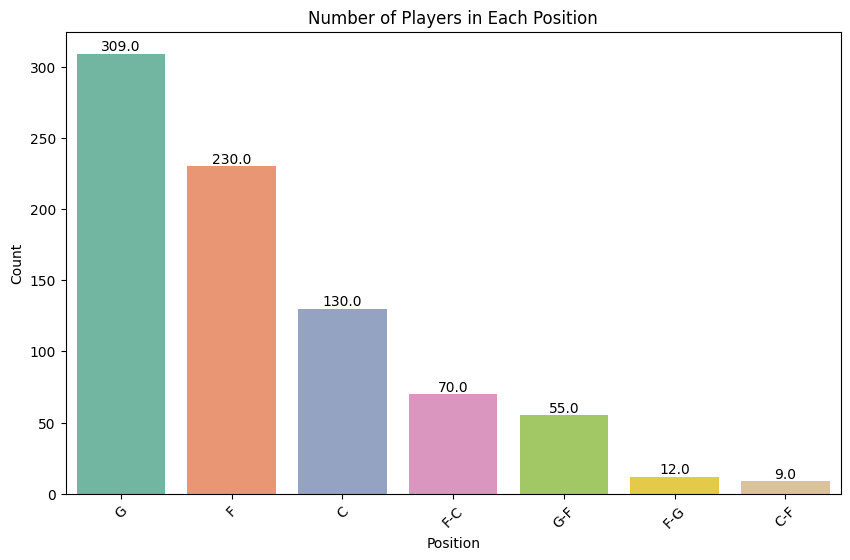

In [6]:
# Create a countplot for player positions
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.countplot(data=players, x='pos', order=players['pos'].value_counts().index, palette='Set2')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Number of Players in Each Position')
plt.xlabel('Position')
plt.ylabel('Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

empty_pos_count = players['pos'].isnull().sum()
print("Number of rows with empty 'pos':", empty_pos_count)

# Show the plot
plt.show()

### Top 10 colleges

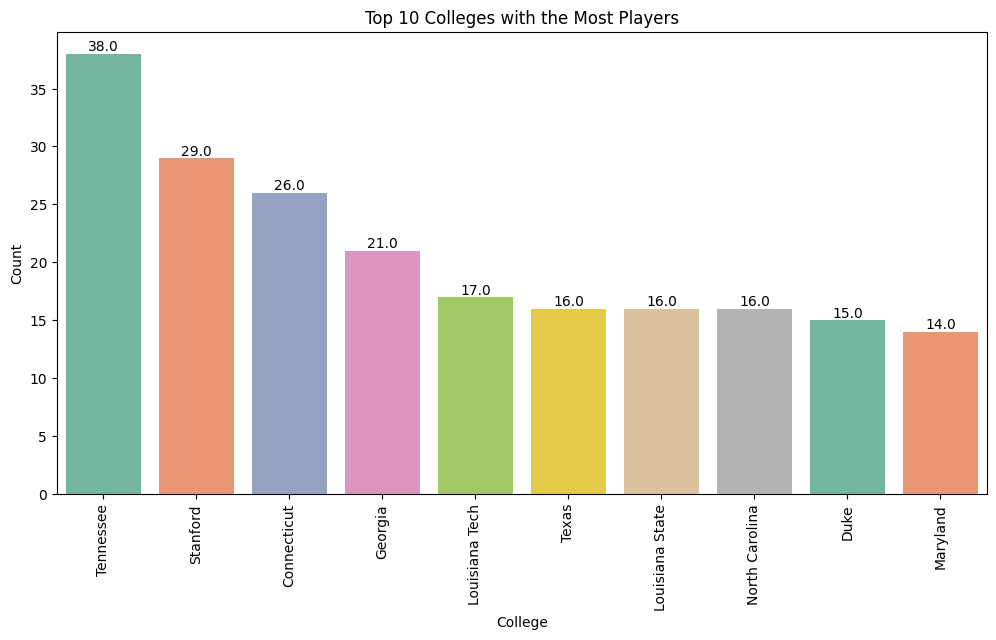

In [7]:
# Get the top 10 colleges with the most players
top_10_colleges = players['college'].value_counts().iloc[:10]

# Create a countplot for the top 10 colleges
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
ax = sns.countplot(data=players, x='college', order=top_10_colleges.index, palette='Set2')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Top 10 Colleges with the Most Players')
plt.xlabel('College')
plt.ylabel('Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()


### Correlation matrix because why not?!

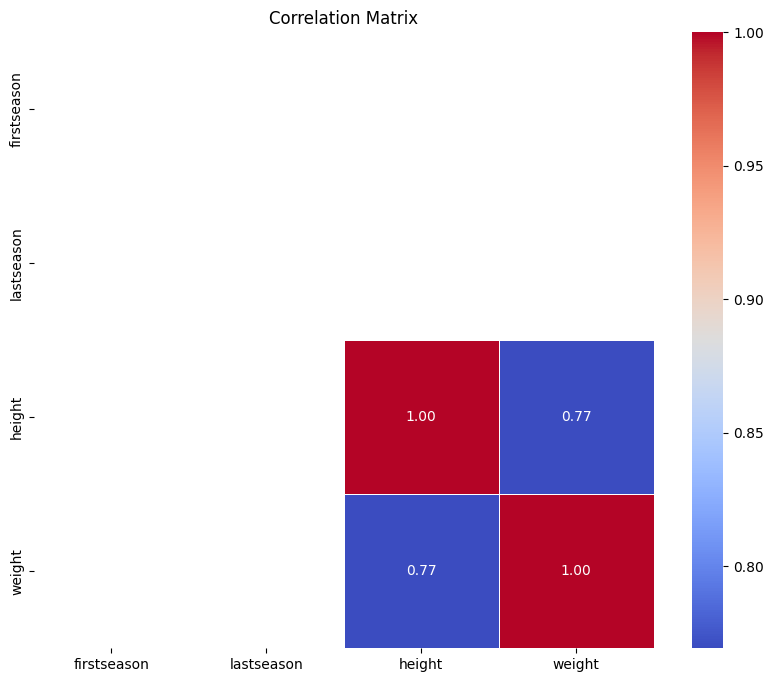

In [8]:
# Select the columns for correlation analysis
numeric_columns = ["firstseason", "lastseason", "height", "weight"]

# Create a subset of the dataset with only the numeric columns
subset = players[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()